In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LassoLarsIC, LassoLarsCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [5]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,hh_2014,cf
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,220.478974,192265.733198,15.657754,13.480262,7.577231,4.540864,4.916275,46.172386,100690.0,4.649098e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,124.833129,115371.753755,15.995618,12.539551,7.604762,5.563126,6.291286,47.994344,227621.0,1.181086e+07
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,45.432009,115472.584515,13.906133,14.077966,7.783972,4.548862,4.895082,45.212014,54985.0,2.485983e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.765702,125086.186971,14.217611,10.902159,7.202424,5.309082,6.006795,43.638071,407208.0,1.776977e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,15.594705,13.531895,7.775563,5.051710,5.576700,47.530572,305713.0,1.453071e+07


In [4]:
for column in df.columns:
    print(column)

households
med_hh_inc_dol
ms_cara
ms_carp
ms_pt
ms_taxi
ms_bike
ms_walk
ms_wfh
unemp
auto_commuters
annual_excess_fuel_consumed_commuters
ahd
tti
dvmt_freeway
ahd_truck
vmt_arterial
n
m
k_avg
edge_length_total
edge_length_avg
streets_per_node_avg
intersection_count
street_length_total
street_segment_count
street_length_avg
circuity_avg
self_loop_proportion
node_density_km
intersection_density_km
edge_density_km
street_density_km
builing_area_sqkm
area_sqkm
electricity_kwh
nat_gas_cuft
fueloil_gal
vmt
cf_transport_phh
cf_housing_phh
cf_food_phh
cf_goods_phh
cf_services_phh
cf_phh
hh_2014
cf


In [10]:
y = df['cf']

In [11]:
cols_to_plot = df.iloc[:, :-1]

In [12]:
cols_to_plot2 = df.iloc[:, :-8]

In [13]:
list(cols_to_plot2)

['households',
 'med_hh_inc_dol',
 'ms_cara',
 'ms_carp',
 'ms_pt',
 'ms_taxi',
 'ms_bike',
 'ms_walk',
 'ms_wfh',
 'unemp',
 'auto_commuters',
 'annual_excess_fuel_consumed_commuters',
 'ahd',
 'tti',
 'dvmt_freeway',
 'ahd_truck',
 'vmt_arterial',
 'n',
 'm',
 'k_avg',
 'edge_length_total',
 'edge_length_avg',
 'streets_per_node_avg',
 'intersection_count',
 'street_length_total',
 'street_segment_count',
 'street_length_avg',
 'circuity_avg',
 'self_loop_proportion',
 'node_density_km',
 'intersection_density_km',
 'edge_density_km',
 'street_density_km',
 'builing_area_sqkm',
 'area_sqkm',
 'electricity_kwh',
 'nat_gas_cuft',
 'fueloil_gal',
 'vmt']

In [14]:
len(cols_to_plot2.columns)

39

In [13]:
#grid = sns.FacetGrid(df, col='cf', col_wrap=3)

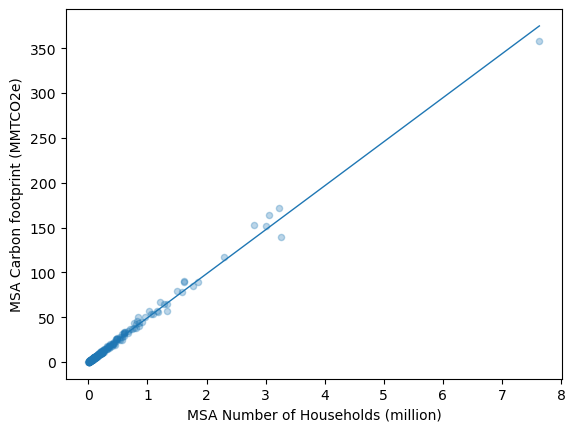

In [52]:
xa = df['hh_2014']/1e6
ya = df['cf']/1e6
g = sns.regplot(x=xa, y=ya, ci=None,scatter_kws=dict(alpha=0.3,s=20),line_kws=dict(lw=1))
g.set_ylabel('MSA Carbon footprint (MMTCO2e)')
g.set_xlabel('MSA Number of Households (million)')
plt.savefig('../../figures/cf_hh.png',dpi=300)

In [15]:
X = df['hh_2014'].values

In [199]:
Y = df['cf'].values

In [192]:
X = sm.add_constant(X, prepend=True)

In [200]:
lm = sm.OLS(Y,X)

In [201]:
result = lm.fit()

In [202]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          5.315e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):                        0.00
Time:                        11:50:53   Log-Likelihood:                         -4819.8
No. Observations:                 297   AIC:                                      9642.
Df Residuals:                     296   BIC:                                      9645.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [156]:
for column in cols_to_plot.columns:
    #grid.map(sns.scatterplot, x, y)
    x = df[column]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(x, y)
    #grid.set_axis_labels(column, 'Total Carbon Footprint (tCO2/yr')
    #grid.set_titles('Total Carbon Footprint vs ' + column)
    plt.xlabel(column)
    plt.ylabel('Total Carbon Footprint (tCO2/yr)')
    plt.title('Total Carbon Footprint vs ' + column)
    plt.savefig('../../figures/' + column + '.png', dpi=300, facecolor='white')
    plt.close(fig)

48.57326549186412

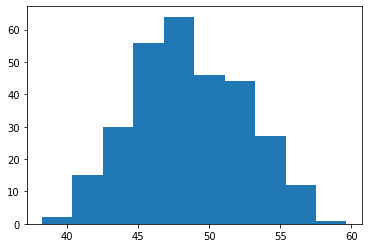

In [159]:
plt.hist(df['cf_phh'])
df['cf_phh'].mean()

In [51]:
len(X)

297

(array([265.,  20.,   5.,   3.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([2.4530000e+03, 7.6542140e+05, 1.5283898e+06, 2.2913582e+06,
        3.0543266e+06, 3.8172950e+06, 4.5802634e+06, 5.3432318e+06,
        6.1062002e+06, 6.8691686e+06, 7.6321370e+06]),
 <BarContainer object of 10 artists>)

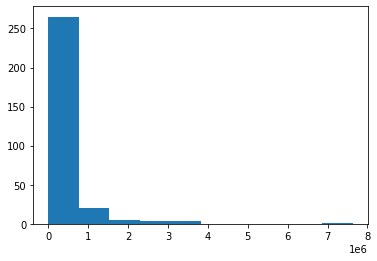

In [123]:
plt.hist(df['hh_2014'])

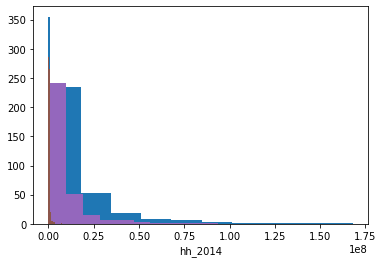

In [119]:
for column in cols_to_plot.columns:
    x = df[column]
    plt.hist(x)
    plt.xlabel(column)
    plt.show

In [57]:
X = cols_to_plot2

In [58]:
X = X.fillna(value=-999)

In [11]:
X.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,2.012523,1.669790,2406.696840,1251.142264,7.048505,7133.829924,92962.405965,277549.286226,220.478974,192265.733198
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,11.231303,8.862967,6351.230011,3360.943838,14.307097,2391.975398,54339.405962,290058.947004,124.833129,115371.753755
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,2.028965,1.667318,2287.583389,1195.808038,6.979580,4172.570196,57568.441526,177636.355916,45.432009,115472.584515
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,4.962653,4.060365,3740.737967,1953.471821,41.455466,7451.054339,44665.027903,285972.599847,1181.765702,125086.186971
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,2.336804,1.791798,1738.064896,924.912213,75.879548,24078.610478,49890.513214,147251.735865,4.024810,101942.760602


In [53]:
rf = RandomForestRegressor(max_features=5, n_estimators=1000, random_state=0, ccp_alpha=0.001)

In [26]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. version

In [59]:
Y = df['cf']/1e+6

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)

In [61]:
y_train

msa
Lubbock, TX                              4.958251
Harrisburg-Carlisle, PA                  5.001775
Riverside-San Bernardino-Ontario, CA    55.297303
Reno, NV                                 6.580491
Champaign-Urbana, IL                     4.851516
                                          ...    
Pittsburgh, PA                          56.532950
Springfield, MO                         84.629552
Duluth, MN-WI                            0.756972
San Angelo, TX                           2.024672
Cape Girardeau, MO-IL                    1.686053
Name: cf, Length: 237, dtype: float64

In [62]:
X_train

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt
msa,,,,,,,,,,,,,,,,,,,,,
"Lubbock, TX",111251,45337,0.817514,0.110346,0.008380,0.008697,0.003989,0.019635,0.031440,6.5,...,2.863292,2.431307,3043.064662,1601.624929,21.561360,6986.364725,34306.656830,1.182813e+05,1.198293,74036.272990
"Harrisburg-Carlisle, PA",222939,57461,0.814018,0.091457,0.015190,0.007251,0.002665,0.034578,0.034841,6.8,...,6.238314,4.994126,4352.025112,2301.173396,24.983777,4316.871218,9349.499279,3.876728e+04,259.706391,19761.953832
"Riverside-San Bernardino-Ontario, CA",1297992,55362,0.769210,0.138283,0.015487,0.011266,0.004041,0.016306,0.045407,14.1,...,2.096545,1.567246,1132.229211,613.575421,124.407626,70950.554246,17065.563887,8.748884e+04,0.562105,48845.628828
"Reno, NV",166284,53047,0.779961,0.107859,0.021022,0.016283,0.006835,0.025731,0.042308,10.6,...,1.117321,0.837878,574.009001,315.372053,13.749872,17638.615675,13734.306644,7.148186e+04,103.456404,47558.240404
"Champaign-Urbana, IL",91858,48182,0.697954,0.088718,0.058812,0.004905,0.023641,0.074283,0.051687,7.1,...,2.927356,2.504292,3228.151750,1679.750835,10.817522,3725.204063,35543.750230,1.584472e+05,79.392115,76620.622666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pittsburgh, PA",989655,51883,0.774544,0.087657,0.053713,0.008940,0.003153,0.034205,0.037788,7.4,...,8.491774,6.430323,5337.638603,2813.900949,103.218347,13834.918619,234288.225888,9.035959e+05,1106.864274,472320.293914
"Springfield, MO",177468,42880,0.822408,0.098797,0.004350,0.012052,0.004186,0.019888,0.038319,8.0,...,5.008748,3.586528,3635.597085,1883.463288,7.665402,7844.076479,340192.320351,1.031248e+06,596.928391,688453.338291
"Duluth, MN-WI",117173,47574,0.791354,0.096119,0.018883,0.010975,0.004100,0.040726,0.037843,7.8,...,0.992437,0.689243,1258.870815,647.184219,8.146157,29123.248708,9717.632589,3.510673e+04,140.692767,25269.263799


In [63]:
rf.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.001, max_features=5, n_estimators=1000,
                      random_state=0)

In [54]:
y_pred = rf.predict(X_test)

(0.0, 150.0)

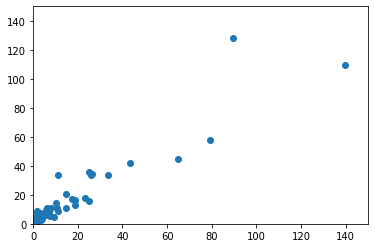

In [55]:
plt.scatter(y_test, y_pred)
plt.ylim(0, 150)
plt.xlim(0, 150)

In [56]:
mean_absolute_percentage_error(y_test, y_pred)

0.693328814272932

In [64]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

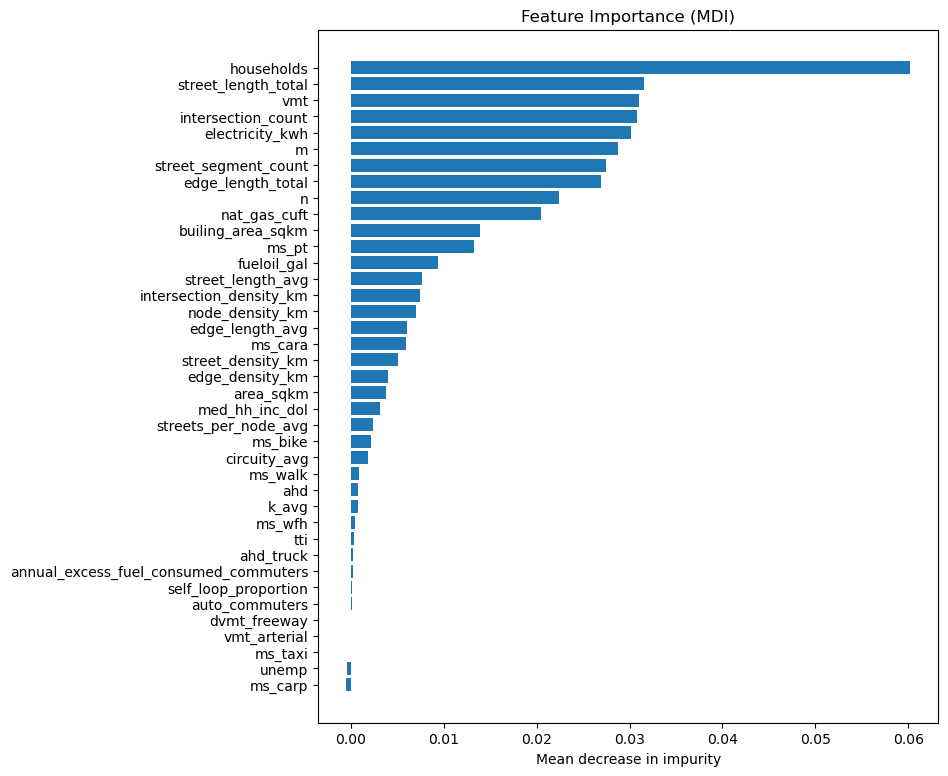

In [65]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [23]:
X.columns

Index(['households', 'med_hh_inc_dol', 'ms_cara', 'ms_carp', 'ms_pt',
       'ms_taxi', 'ms_bike', 'ms_walk', 'ms_wfh', 'unemp', 'auto_commuters',
       'annual_excess_fuel_consumed_commuters', 'ahd', 'tti', 'dvmt_freeway',
       'ahd_truck', 'vmt_arterial', 'n', 'm', 'k_avg', 'edge_length_total',
       'edge_length_avg', 'streets_per_node_avg', 'intersection_count',
       'street_length_total', 'street_segment_count', 'street_length_avg',
       'circuity_avg', 'self_loop_proportion', 'node_density_km',
       'intersection_density_km', 'edge_density_km', 'street_density_km',
       'builing_area_sqkm', 'area_sqkm', 'electricity_kwh', 'nat_gas_cuft',
       'fueloil_gal', 'vmt'],
      dtype='object')

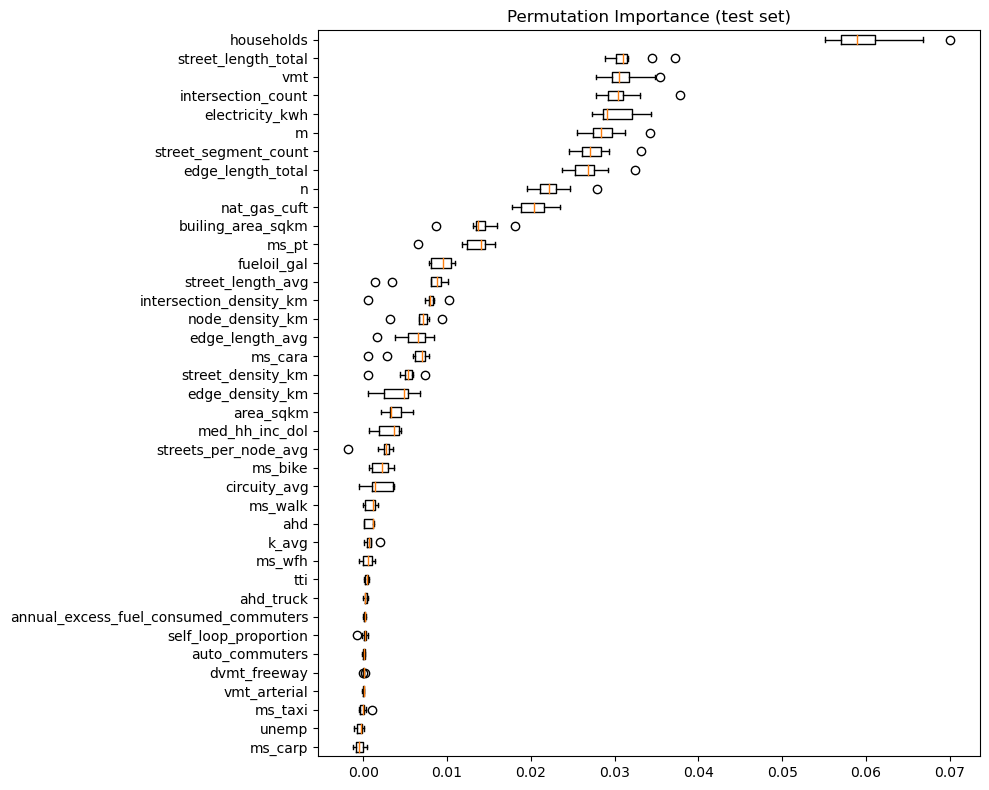

In [73]:
plt.figure(figsize=(10,8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],)

plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.savefig('../../figures/perm_imp.png',dpi=300)

In [68]:
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
lasso_cv = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X_train, y_train)
#best_model = lasso_cv.fit(X_train, y_train) # the normal standardization is done by default
t_lasso_cv = time.time() - t1

Computing regularization path using the coordinate descent lasso...


C:\Users\acwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.248121389719017, tolerance: 15.906260285394646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\acwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.39364370091062, tolerance: 15.906260285394646
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\acwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning

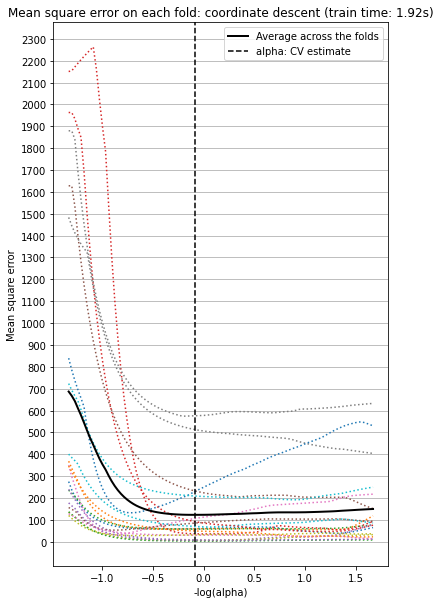

In [82]:
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4
# Display results
lasso = lasso_cv[-1]
m_log_alphas = -np.log10(lasso.alphas_ + EPSILON)

plt.figure(figsize=(6,10))
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, lasso.mse_path_, ':')
plt.plot(m_log_alphas, lasso.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.yticks(np.arange(0,2500,100))
plt.grid(axis='y')
plt.axis('tight')
plt.show()

In [77]:
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X,y))
coef = pd.Series(lasso.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.figure(figsize=(8,10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Best alpha using built-in LassoCV: 1.222824


TypeError: only size-1 arrays can be converted to Python scalars

In [80]:
np.min(lasso.mse_path_)

2.873035835357538